# Clustering

---
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine residents segmentations so that we can use it to develop marketing plans accordingly.<br>
<br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:

            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income:

            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>

###1. Upload and clean data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [3]:
# Read data
BartRider = pd.read_csv("/content/drive/MyDrive/BartRider.csv")
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,3,10,N,4,F,7,English,1,0,Rent,3,Yes
1,3,11,N,4,M,6,English,3,1,Rent,2,No
2,2,10,N,5,M,6,English,2,0,Rent,3,No
3,5,6,Y,5,M,4,English,3,0,Rent,5,No
4,4,9,N,4,F,4,English,3,1,Rent,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,2,9,N,2,F,1,English,5,1,Parent,6,Yes
5489,2,9,N,2,F,2,Other,4,1,Parent,4,Yes
5490,1,13,N,2,F,2,Spanish,4,2,Parent,1,Yes
5491,4,9,N,3,M,1,English,3,2,Parent,4,Yes


In [4]:
# Show the head rows of a data frame
BartRider.head()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,3,10,N,4,F,7,English,1,0,Rent,3,Yes
1,3,11,N,4,M,6,English,3,1,Rent,2,No
2,2,10,N,5,M,6,English,2,0,Rent,3,No
3,5,6,Y,5,M,4,English,3,0,Rent,5,No
4,4,9,N,4,F,4,English,3,1,Rent,4,No


In [5]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [6]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [7]:
# Examine variable type
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

###2. Prepare data set for clustering

In [8]:
# Create dummy variables
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent','Rider'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,3,10,4,7,1,0,3,False,False,False,False,False,True,True
1,3,11,4,6,3,1,2,False,True,False,False,False,True,False
2,2,10,5,6,2,0,3,False,True,False,False,False,True,False
3,5,6,5,4,3,0,5,True,True,False,False,False,True,False
4,4,9,4,4,3,1,4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,2,9,2,1,5,1,6,False,False,False,False,True,False,True
5489,2,9,2,2,4,1,4,False,False,True,False,True,False,True
5490,1,13,2,2,4,2,1,False,False,False,True,True,False,True
5491,4,9,3,1,3,2,4,False,True,False,False,True,False,True


In [9]:
# Apply minmax normalization
min_max_scaler = preprocessing.MinMaxScaler()
BartRider_normalized = pd.DataFrame(min_max_scaler.fit_transform(BartRider))
BartRider_normalized.columns = BartRider.columns
BartRider_normalized

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,0.333333,0.35,0.6,0.750,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.333333,0.40,0.6,0.625,0.4,0.333333,0.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.166667,0.35,0.8,0.625,0.2,0.000000,0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.15,0.8,0.375,0.4,0.000000,0.4,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.500000,0.30,0.6,0.375,0.4,0.333333,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.166667,0.30,0.2,0.000,0.8,0.333333,0.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5489,0.166667,0.30,0.2,0.125,0.6,0.333333,0.3,0.0,0.0,1.0,0.0,1.0,0.0,1.0
5490,0.000000,0.50,0.2,0.125,0.6,0.666667,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
5491,0.500000,0.30,0.4,0.000,0.4,0.666667,0.3,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## 3. Clustering model

In [10]:
# Build a clustering model with n_clusters = 2. Set random_state=0.
model1 = KMeans(n_clusters=2, random_state=0)
model1.fit(BartRider_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [11]:
# Generate the cluster labels
model1.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
# Show cluster size
Counter(model1.labels_)

Counter({0: 4100, 1: 1393})

In [13]:
# Show cluster centroids
pd.DataFrame({'cluster 1':BartRider[model1.labels_==0].mean(axis=0), 'cluster 2':BartRider[model1.labels_==1].mean(axis=0)})

,cluster 1,cluster 2
Age,4.044634,1.816942
DistToWork,11.474878,11.432879
Education,4.249756,2.763101
Income,5.908049,2.939698
NbrInHouseHold,2.568049,3.972721
NbrInHouseholdUnder18,0.520000,1.266332
YrsInArea,4.263659,4.383345
DualInc_Y,0.333659,0.003589
Gender_M,0.469512,0.423546
Language_Other,0.025122,0.061737


Q1. What is the percentage of BART riders for cluster 1 and 2? (1 point)<br>

For the first cluster the percentage of BART riders is 26.29% and for second cluster it is 90.23%

Q2. Use the attributes information of cluster centers to understand the profile of residents. Interpret each cluster based on your understanding. (1 point)<br>

Q2. Use the attributes information of cluster centers to understand the profile of residents. Interpret each cluster based on your understanding.

  - Age: The residents in this cluster have higher age as compared to the second cluster.
  - DistToWork: The average distance to work is almost same for both the clusters.
  - Education: education of first cluster is higher as copared to second cluster.
  - Income: Income of people in cluster 1 is much higher as compared to second cluster.
  - NbrInHouseHold: the number of people living in a house is less in first cluster.
  - NbrInHouseholdUnder18: In the first cluster there as less people under 18 stating that there are more teens or children in second cluster.
  - YrsInArea: In both the clusters the people have been living for almost same amount of years in the Area.
  - DualInc_Y: Dual income is much higher in first cluster indicating that two members of the family is an earning member.
  - Gender_M: Male are slighty higher in first cluster
  - Language_Other: people in second cluster is more diverse in languages spoken.
  - Language_Spanish: Much higher percentage of people speake spanish in the second cluster.
  - OwnRent_Parent: Much higher percentage of people live with parents in second cluster
  - OwnRent_Rent: More percentage of people rent their own appartment in the first cluster.
  - Rider_Yes: almost 90% of people use rides such as public transportation.

  From the above description we can say that the first cluster if income earning professionals. They are more settled in their career looking at their education level.

  For the second cluster we can name them students as their income level states they might be in the starting of their career, education level indicate they might be pursuing education at present.


In [14]:
# Build a clustering model with n_clusters = 3 (0.5 point)

model2 = KMeans(n_clusters=3, random_state=0)
model2.fit(BartRider_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [15]:
# Generate the cluster labels
model2.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [16]:
# Show cluster size (0.5 point)
Counter(model2.labels_)

Counter({2: 1810, 0: 2293, 1: 1390})

In [17]:
# Show cluster centroids (0.5 point)
pd.DataFrame({'cluster 1':BartRider[model2.labels_==0].mean(axis=0), 'cluster 2':BartRider[model2.labels_==1].mean(axis=0),'cluster 3':BartRider[model2.labels_==2].mean(axis=0)})

,cluster 1,cluster 2,cluster 3
Age,4.702573,1.813669,3.209945
DistToWork,11.447449,11.428777,11.512707
Education,4.451810,2.761151,3.992818
Income,7.102486,2.932374,4.395580
NbrInHouseHold,2.799389,3.972662,2.277348
NbrInHouseholdUnder18,0.634104,1.265468,0.377348
YrsInArea,4.610118,4.383453,3.824862
DualInc_Y,0.464893,0.003597,0.166851
Gender_M,0.404710,0.423022,0.551934
Language_Other,0.020497,0.061871,0.030939


Q3. Assign a meaningful name to each cluster based on the representative profile of residents in each cluster. Explain the reasons for the name you choose. (1 point)<br>



I would give the first cluster name 'senior professionals' as they indicate a higher age, higher income, higher education, less number of people in a house

the second cluster would be named 'students' they have lowest age, lower level of income, lower educational level, most number of percentage live with parents

the third cluster would be named 'yound professionals' as they are mid aged people, have lesser income than first and higher than second cluster, none of them live with their parents

Q4. Based on the cluster size and centroids, which n_clusters (n_clusters=2 or n_clusters=3) you will use, and why? (1 point)<br>

I would use cluster with n_clusters=3 as I get more depth information to analyse and get more precise clusters

Q5. If we segment residents into 3 clusters, what marketing plans you can use to target each cluster? (1 point)<br>


for first cluster marketing plan would be more family oriented and things that gives more comfort
for second cluster I would market more transportation areas, study plans
for third cluster, more better opportunities for career, more better std of living at lower cost

## 4. Elbow test to determine optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Test')

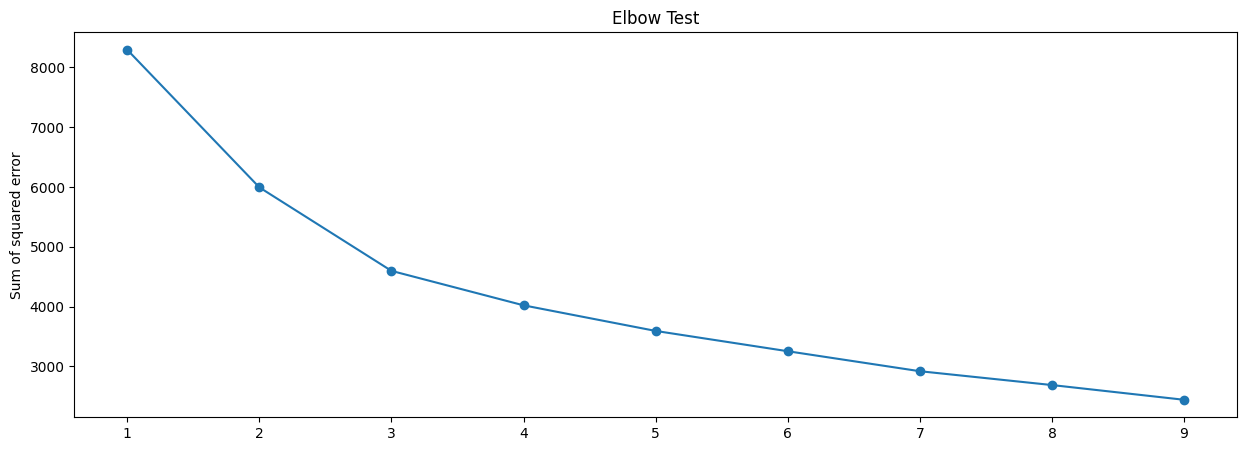

In [18]:
Sum_of_squared_error = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(BartRider_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 10), Sum_of_squared_error)
plt.plot(range(1, 10), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')

Q6. What is the optimal cluster number? (1 point)<br>

The optimal cluster number would be 4

Q7. Try k = 4. Use the attributes information of cluster centers to understand the profile of residents. Interpret each cluster based on your understanding. Can you label each cluster? Do we have indeed 4 clusters/segments of residents or 3 was a better option? (2 points)

In [19]:
model3 = KMeans(n_clusters=4, random_state=0)
model3.fit(BartRider_normalized)
model3.labels_
Counter(model3.labels_)
pd.DataFrame({'cluster 1':BartRider[model3.labels_==0].mean(axis=0), 'cluster 2':BartRider[model3.labels_==1].mean(axis=0),'cluster 3':BartRider[model3.labels_==2].mean(axis=0), 'cluster 4':BartRider[model3.labels_==3].mean(axis=0)})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster 1,cluster 2,cluster 3,cluster 4
Age,1.809524,4.669643,3.189296,4.720000
DistToWork,11.428571,11.502435,11.501408,11.406364
Education,2.757576,4.448864,3.985352,4.450909
Income,2.925685,7.136364,4.352113,7.041818
NbrInHouseHold,3.975469,2.802760,2.272676,2.787273
NbrInHouseholdUnder18,1.266234,0.629058,0.376901,0.633636
YrsInArea,4.382395,4.585227,3.820282,4.620909
DualInc_Y,0.003608,0.000000,0.150986,1.000000
Gender_M,0.424242,0.379870,0.558873,0.424545
Language_Other,0.062049,0.024351,0.030986,0.016364


The first cluster would be named 'students' they have lowest age, lower level of income, lower educational level, most number of percentage live with parents


the third cluster would be named 'yound professionals' as they are mid aged people, have lesser income than first and higher than second cluster, none of them live with their parents

the second and fourth cluster do not have much difference and is not labelable as age is higher of 4th cluster but income is higher of 2nd cluster. The education is higher of 4th cluster but the number of people living with their parents is higher in 2nd cluster.


3 cluster was a better option.





In [20]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS670_lab09.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/IS670_lab09.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_